<a href="https://colab.research.google.com/github/Jugalcody/Cardiovascular-Disease-Predictor/blob/main/PythonCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('heart.csv')

#cleaning now

df=df.drop("bp_category",axis="columns")
df=df.drop("bp_category_encoded",axis="columns")
df=df.drop("age",axis="columns")
df=df.drop("id",axis="columns")
df=df.dropna()
df = df[df['weight'] < 150]
df = df[df['bmi'] < 70]



In [49]:
#Training

X = df.drop('cardio',axis="columns")
y = df['cardio']

df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31312,2,170,90.0,140,90,1,1,0,0,1,1,46,31.141869
31313,1,153,55.0,120,80,1,1,0,0,1,0,41,23.495237
31314,1,168,68.0,120,80,1,1,0,0,1,0,44,24.092971
31315,2,165,69.0,140,80,1,1,0,0,1,1,58,25.344353


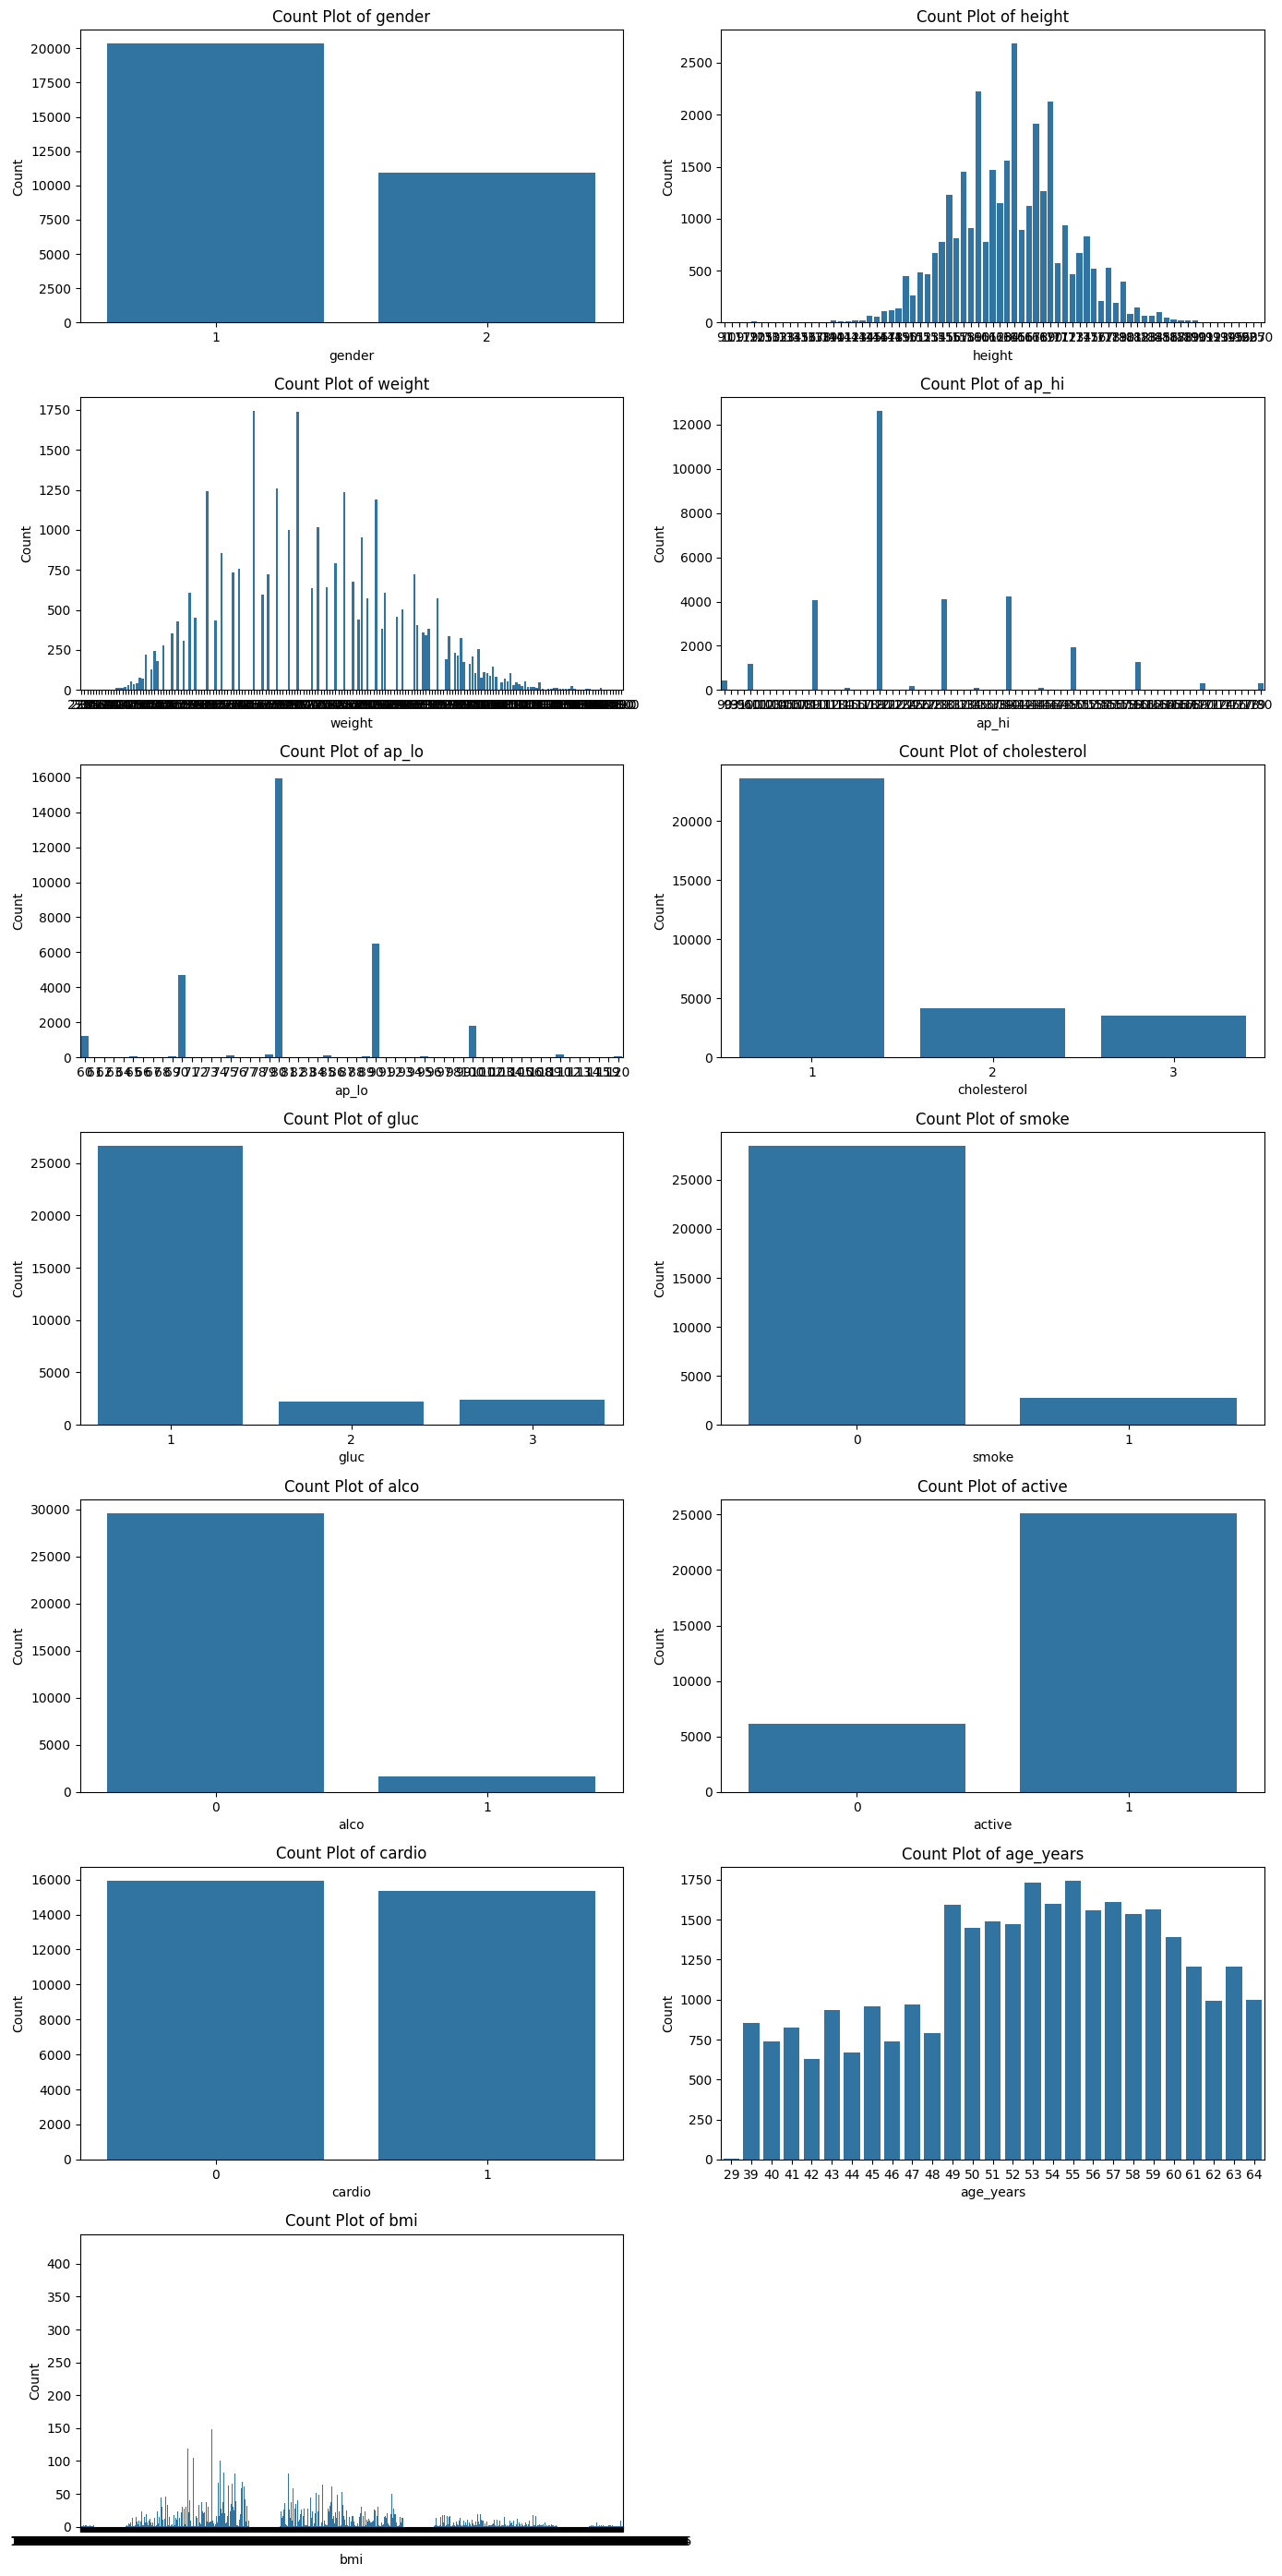

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = df.columns.tolist()
n = len(cols)

rows = math.ceil(n / 2)
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [44]:
df = df[~((df['smoke'] == 0)  & (df['gluc'] == 1) & (df['cholesterol'] == 1) )]

In [61]:
#RandomForestClassifier and LogisticRegression algorithm , lets see who works better

#RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)



Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      3145
           1       0.72      0.70      0.71      3109

    accuracy                           0.72      6254
   macro avg       0.72      0.72      0.72      6254
weighted avg       0.72      0.72      0.72      6254



In [55]:
#LogisticRegression algorithm

from sklearn import linear_model as l
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and labels
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = l.LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


#Accuracy of LogisticRegression is better than RandomForestClassifier but recall is much lesser which is most imp in predicting positive cases of heart diseases,
#Thus we are choosing RandomForestClassifier

Accuracy: 0.7286536616565398
Confusion Matrix:
 [[2473  672]
 [1025 2084]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.74      3145
           1       0.76      0.67      0.71      3109

    accuracy                           0.73      6254
   macro avg       0.73      0.73      0.73      6254
weighted avg       0.73      0.73      0.73      6254



In [62]:

#Converting to keras model
#Then will convert it to tflite model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.1)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5066 - loss: 1.2722 - val_accuracy: 0.5276 - val_loss: 0.6922
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5144 - loss: 0.6928 - val_accuracy: 0.5280 - val_loss: 0.6925
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5073 - loss: 0.6931 - val_accuracy: 0.5276 - val_loss: 0.6924
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5040 - loss: 0.6931 - val_accuracy: 0.5276 - val_loss: 0.6922
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.5276 - val_loss: 0.6924
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5136 - loss: 0.6928 - val_accuracy: 0.5276 - val_loss: 0.6923
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5077 - loss: 0.6931 - val_accuracy: 0.5276 - val_loss: 0.6921
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5146 - loss: 0.6928 - 

In [63]:
#Finally we are converting our model to TensorFlow Lite Model

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("heart_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpooliwx07'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133625147463952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133625147464720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133625147464144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133625147464912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133625147465488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133625147463376: TensorSpec(shape=(), dtype=tf.resource, name=None)
